# Homework 2 CSCI 335


# Programming Section (16 points)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

(1 point) Load the dataset

In [3]:
#data = pd.read_csv('houses.csv')
data = pd.read_csv("https://github.com/anton-selitskiy/RIT_ML/raw/refs/heads/main/2025_spring/Week02_EDA/HW2/houses.csv", sep = ',')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


(2 points) Asses the data and clean them

In [4]:
data.shape

(20640, 10)

In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.dropna(subset = ['total_bedrooms'], inplace=True)

In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


(1 point) Create features X and target Y

In [9]:
y = data['median_house_value']
data.drop('median_house_value', inplace=True, axis=1)

In [10]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [11]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


(1 point) Divide the dataset into training, validation, and testing sets: (X_train, y_train), (X_val, y_val), and (X_test, y_test)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

 (1 point) Create a transformation (ColumnTransformer) that applies OneHotEncoder to the
nominal column only (remainder='passthrough'). Fit it with X_train and print the first five lines
of the transformed X_train.

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [24]:
onee = OneHotEncoder(drop='first')

In [31]:
# columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(drop='first'), ['ocean_proximity'])], remainder='passthrough')
# columnTransformer.fit_transform(X_train)

columnTransformer = ColumnTransformer(transformers=[('one-hot', onee, ['ocean_proximity']),], remainder='passthrough')
columnTransformer.fit_transform(X_train)

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5390e+03, 6.9900e+02,
        3.6750e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.2000e+02, 4.2000e+01,
        6.9930e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 6.3600e+02, 2.4400e+02,
        5.1741e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.5210e+03, 8.2800e+02,
        3.0200e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.3740e+03, 8.7900e+02,
        3.5586e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 8.7700e+02, 3.1300e+02,
        4.7891e+00]])

In [32]:
columnTransformer.get_feature_names_out()

array(['one-hot__ocean_proximity_INLAND',
       'one-hot__ocean_proximity_ISLAND',
       'one-hot__ocean_proximity_NEAR BAY',
       'one-hot__ocean_proximity_NEAR OCEAN', 'remainder__longitude',
       'remainder__latitude', 'remainder__housing_median_age',
       'remainder__total_rooms', 'remainder__total_bedrooms',
       'remainder__population', 'remainder__households',
       'remainder__median_income'], dtype=object)

In [33]:
pd.DataFrame(columnTransformer.transform(X_train), columns=columnTransformer.get_feature_names_out()).head()

,one-hot__ocean_proximity_INLAND,one-hot__ocean_proximity_ISLAND,one-hot__ocean_proximity_NEAR BAY,one-hot__ocean_proximity_NEAR OCEAN,remainder__longitude,remainder__latitude,remainder__housing_median_age,remainder__total_rooms,remainder__total_bedrooms,remainder__population,remainder__households,remainder__median_income
0,1.0,0.0,0.0,0.0,-121.35,38.00,22.0,3564.0,730.0,1539.0,699.0,3.6750
1,0.0,0.0,0.0,0.0,-117.18,33.51,13.0,270.0,42.0,120.0,42.0,6.9930
2,0.0,0.0,0.0,0.0,-117.79,33.70,16.0,1416.0,249.0,636.0,244.0,5.1741
3,0.0,0.0,0.0,0.0,-116.83,32.81,18.0,2367.0,402.0,1021.0,395.0,4.8125
4,0.0,0.0,0.0,0.0,-118.55,34.20,31.0,1963.0,420.0,1494.0,415.0,3.5313


In [30]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16302,-121.35,38.00,22.0,3564.0,730.0,1539.0,699.0,3.6750,INLAND
12213,-117.18,33.51,13.0,270.0,42.0,120.0,42.0,6.9930,<1H OCEAN
10638,-117.79,33.70,16.0,1416.0,249.0,636.0,244.0,5.1741,<1H OCEAN
15054,-116.83,32.81,18.0,2367.0,402.0,1021.0,395.0,4.8125,<1H OCEAN
3913,-118.55,34.20,31.0,1963.0,420.0,1494.0,415.0,3.5313,<1H OCEAN


(3 points) Train KNeighborsRegressor on the transformed X_train and select the value of k on
the transformed X_val. Choose a metric that you think evaluates this problem the best. Please,
state why you chose it.

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

In [35]:
train_accuracy = []
mse_train_accuracy = []
val_accuracy = []
mse_val_accuracy = []
for i in range(1, 50):
    pipe1 = Pipeline([('colTr', columnTransformer), ('reg', KNeighborsRegressor(n_neighbors=i))])
    pipe1.fit(X_train, y_train)
    train_accuracy.append(mean_absolute_error(pipe1.predict(X_train),y_train))
    val_accuracy.append(mean_absolute_error(pipe1.predict(X_val),y_val))
    mse_train_accuracy.append(mean_squared_error(pipe1.predict(X_train),y_train))
    mse_val_accuracy.append(mean_squared_error(pipe1.predict(X_val),y_val))

In [36]:
import matplotlib.pyplot as plt

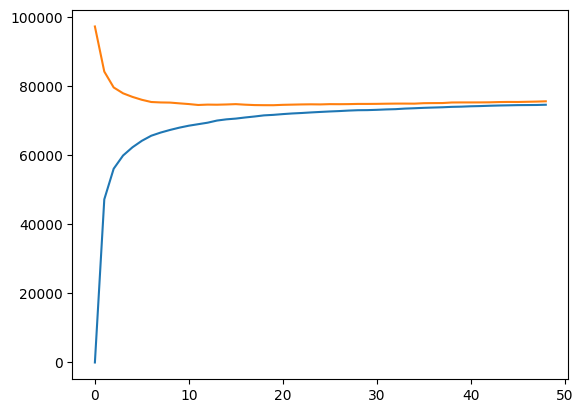

In [37]:
plt.plot(train_accuracy)
plt.plot(val_accuracy)

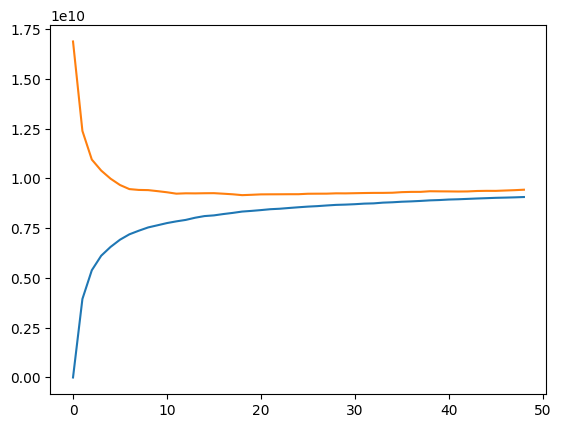

In [38]:
plt.plot(mse_train_accuracy)
plt.plot(mse_val_accuracy)

In [39]:
best_k1 = np.argmin(val_accuracy)+1
best_k1

20

In [40]:
mse_best_k1 = np.argmin(mse_val_accuracy)+1
mse_best_k1

19

After training KNeighborsRegressor on the transformed X_train data, I believe that the better metric for evaluating this problem is mean_absolute_error. I plotted the information for both mean_absolute_error and mean_squared_error, and I believe both metrics are very suitable for evaluating this problem. I chose mean_absolute_error because I believe that it's better to treat each error equally in this problem. When using mean_squared_error, outliers will make a greater impact on how we determine our k value, and again, I feel it is better to simply treat each error equally for this problem.

Also, the best value for k using mean_absolute_error as the best metric is 20.

(1 point) Report the results using X_test and an appropriate metric.

In [41]:
X_train_val = pd.concat([X_train, X_val], ignore_index=True)
y_train_val = pd.concat([y_train, y_val], ignore_index=True)

In [42]:
pipe1 =Pipeline([('tr', columnTransformer),('reg', KNeighborsRegressor(n_neighbors=best_k1))])
pipe1.fit(X_train,y_train)
print('Error after training on Train:', mean_absolute_error(pipe1.predict(X_test),y_test))
pipe1.fit(X_train_val,y_train_val)
print('Error after training on Train+Validation:', mean_absolute_error(pipe1.predict(X_test),y_test))

Error after training on Train: 76460.3651945192
Error after training on Train+Validation: 75818.47492047957


(1 point) Modify the transformation applying a scaler to all numerical columns

In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [44]:
train_accuracy_scaler = []
val_accuracy_scaler =[]
for i in range(1,50):
  pipe2 =Pipeline([('tr', columnTransformer),('scaler', StandardScaler()),('reg', KNeighborsRegressor(n_neighbors=i))])
  pipe2.fit(X_train,y_train)
  train_accuracy_scaler.append(mean_absolute_error(pipe2.predict(X_train),y_train))
  val_accuracy_scaler.append(mean_absolute_error(pipe2.predict(X_val),y_val))

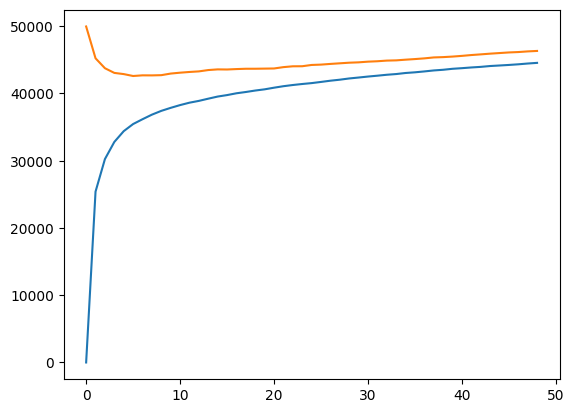

In [45]:
plt.plot(train_accuracy_scaler)
plt.plot(val_accuracy_scaler)

In [46]:
best_k2 = np.argmin(val_accuracy_scaler)+1
best_k2

6

(3 point) Repeat the training with the scaled data.

In [47]:
pipe2 =Pipeline([('tr', columnTransformer),('sc', StandardScaler()),('reg', KNeighborsRegressor(n_neighbors=best_k2))])
pipe2.fit(X_train,y_train)
print('Error after training on Train:', mean_absolute_error(pipe2.predict(X_test),y_test))
pipe2.fit(X_train_val,y_train_val)
print('Error after training on Train+Validation:', mean_absolute_error(pipe2.predict(X_test),y_test))

Error after training on Train: 42726.877293858575
Error after training on Train+Validation: 41562.0086045184


(2 point) Discuss the results. I would suggest plotting histograms of the errors for both cases. If
the results are different, can you think of the reason?

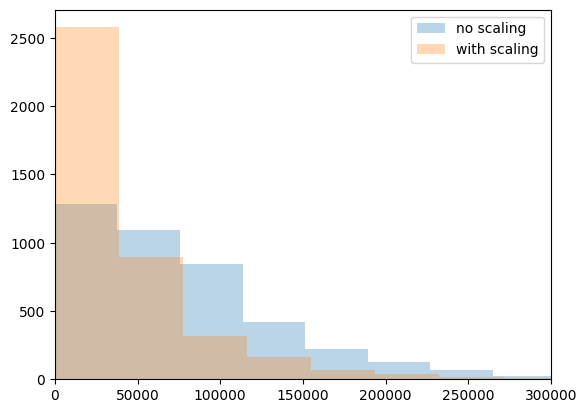

In [48]:
plt.hist(np.abs((pipe1.predict(X_test)-y_test)),  alpha=0.3, label='no scaling')
plt.hist(np.abs((pipe2.predict(X_test)-y_test)),  alpha=0.3, label='with scaling')
plt.xlim(0, 300000)
plt.legend()

The results are clearly different. We see that scaling led to incorrect predictions being much closer to their correct value than without scaling. Essentially, the average magnitude of error significantly decreased. Prior to scaling, certain features were likely having too much of an impact on predictions, and small differences in the values for these less important features were causing errors of greater magnitude. Scaling the features helps to limit the impact of less notable, but still important, features, and it clearly helped lead to better predictions.

# Writing Assesment (4 points)

(2 point) What is the difference between supervised and unsupervised problems?

 The key difference between supervised and unsupervised learning lies in the presence of labeled data. Supervised learning involves training a model on a dataset where the input features (X) are paired with known target labels (Y). The model learns to map inputs to outputs and is evaluated based on how well it predicts the correct labels. Unsupervised learning involves training a model on a dataset without labeled outputs. The model identifies patterns, structures, or groupings within the data.

(2 point) What is the purpose of splitting data into training, validation, and testing sets? What is a
typical split-up?

Splitting data into training, validation, and testing sets is crucial to ensure that our model learns effectively and generalizes well to unseen data. We use training data to train the model by adjusting its parameters. We use the validation data to tune hyperparameters. And we use the test data to evaluate the final model's performance on completely unseen data.

Depending on how large our data set is, a typical split-up should be something like 70/15/15 to 90/5/5 (the bigger the data set, the more data we can allocate for training).